<a href="https://colab.research.google.com/github/tuerosdarikson/redes_neuronales_/blob/main/redes_neuronales_tueros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataBasePrestDigital.csv to dataBasePrestDigital.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:
df = pd.read_csv("dataBasePrestDigital.csv", sep=";")

df['trxDigitalUm'] = pd.to_numeric(df['trxDigitalUm'], errors='coerce')
df['promSaldoPrest3Um'] = pd.to_numeric(df['promSaldoPrest3Um'], errors='coerce')
df.dropna(subset=['trxDigitalUm', 'promSaldoPrest3Um'], inplace=True)

df['genero_cod'] = LabelEncoder().fit_transform(df['genero'])
df['procedencia_cod'] = LabelEncoder().fit_transform(df['procedencia'])

df.head()

,mes,cliente,estadoCliente,rngEdad,genero,rngSueldo,procedencia,operDigital,trxDigitalUm,promTrxDig3Um,...,tenTarjeta,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm,ventaPrestDig,genero_cod,procedencia_cod
0,201608,1,A,<35-45],M,<3500-4500],lima,NN,0,0.000000,...,TC-TD,5844.17,5844.17,5844.170000,0.0,1.0,0,0,1,0
1,201608,2,A,<25-35],M,<3500-4500],lima,BXI-BM,200,192.666667,...,TC-TD,0.00,0.00,2701.470000,0.0,0.0,0,0,1,0
2,201608,3,A,<35-45],F,<4500-6000],lima,BM,407,332.333333,...,TD,0.00,0.00,3148.746667,0.0,0.0,0,0,0,0
3,201608,4,A,<25-35],F,<3500-4500],lima,NN,0,0.000000,...,NN,67.67,67.67,67.670000,0.0,1.0,0,0,0,0
4,201608,5,A,<35-45],F,<=1000,lima,NN,0,0.000000,...,TD,0.00,0.00,0.000000,0.0,0.0,0,0,0,0


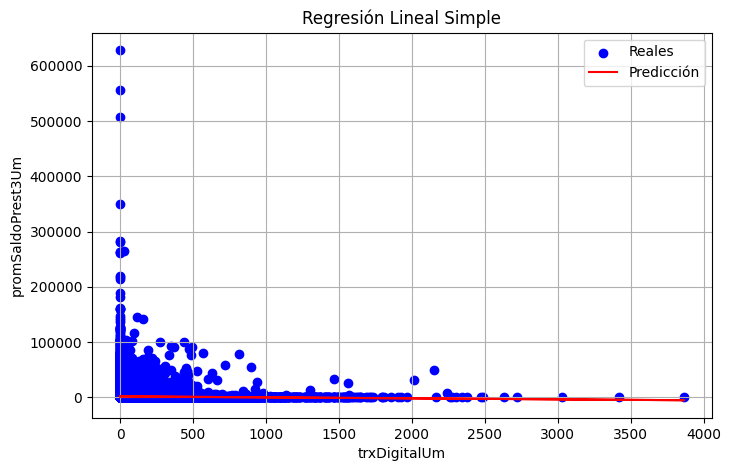

In [ ]:
X = df[['trxDigitalUm']]
y = df['promSaldoPrest3Um']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred = modelo_lr.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('trxDigitalUm')
plt.ylabel('promSaldoPrest3Um')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
features = ['trxDigitalUm', 'genero_cod', 'procedencia_cod']
X_nn = df[features]
y_nn = df['promSaldoPrest3Um']

scaler = StandardScaler()
X_nn_scaled = scaler.fit_transform(X_nn)

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn_scaled, y_nn, test_size=0.2, random_state=42)

modelo_nn = Sequential([
    Input(shape=(len(features),)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

modelo_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

historial = modelo_nn.fit(X_train_nn, y_train_nn, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 54323036.0000 - mae: 2561.3020 - val_loss: 69627384.0000 - val_mae: 2710.5483
Epoch 2/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 51650252.0000 - mae: 2696.7688 - val_loss: 69601728.0000 - val_mae: 2747.2407
Epoch 3/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 59499732.0000 - mae: 2741.0679 - val_loss: 69575688.0000 - val_mae: 2812.7576
Epoch 4/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 65657456.0000 - mae: 2761.9675 - val_loss: 69617168.0000 - val_mae: 2715.3369
Epoch 5/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - loss: 53477376.0000 - mae: 2710.2705 - val_loss: 69584184.0000 - val_mae: 2761.7300
Epoch 6/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 54032156.0000 - mae: 2704.1995 - val_loss: 69588992.0000 - val_mae: 2744.3547
Epoch 7/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 53045108.0000 - mae: 2725.7896 - val_loss: 69576144.0000 - val_mae: 2763.2849
Epoch 

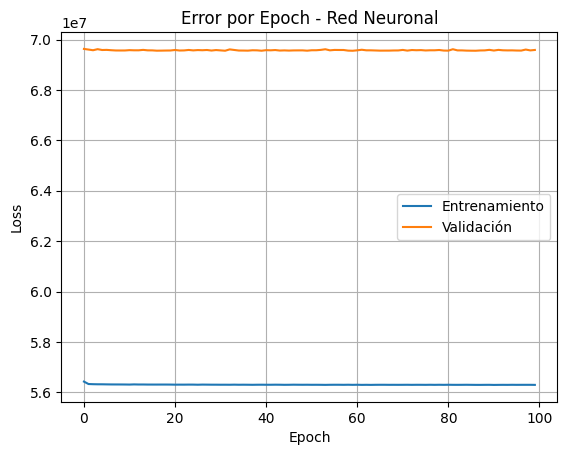

In [ ]:
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Error por Epoch - Red Neuronal')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

2720/2720 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


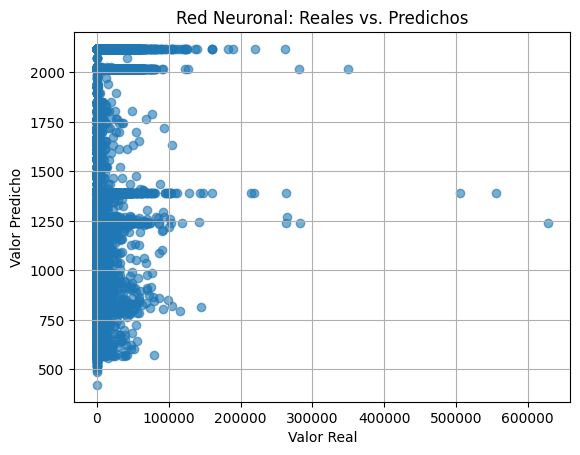

MAE: 2697.80
MSE: 64210439.54
RMSE: 8013.14


In [ ]:
y_pred_nn = modelo_nn.predict(X_test_nn)

plt.scatter(y_test_nn, y_pred_nn, alpha=0.6)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Red Neuronal: Reales vs. Predichos')
plt.grid(True)
plt.show()

mae = mean_absolute_error(y_test_nn, y_pred_nn)
mse = mean_squared_error(y_test_nn, y_pred_nn)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

In [ ]:
conteo = {}

for lugar in df['procedencia']:
    if lugar not in conteo:
        conteo[lugar] = 1
    else:
        conteo[lugar] += 1

print("\nProcedencias con más de 500 registros:")
for lugar, total in conteo.items():
    if total > 500:
        print(f"{lugar}: {total} registros")



Procedencias con más de 500 registros:
lima: 187013 registros
provincia: 248070 registros


# Proyecto de Predicción de Montos de Préstamos Digitales en Perú



---



##  Objetivo del Trabajo



El presente proyecto tiene como finalidad aplicar técnicas de aprendizaje supervisado —específicamente regresión lineal simple y redes neuronales artificiales— para predecir el monto promedio de préstamos digitales otorgados a clientes peruanos. El desarrollo se realizó utilizando Python, con el apoyo de bibliotecas especializadas como Pandas, NumPy, Scikit-learn y TensorFlow/Keras. Asimismo, se utilizó GitHub como sistema de control de versiones y plataforma de documentación del proyecto.



---



##  Breve Descripción del Dataset



El dataset utilizado proviene de Kaggle y se titula **"Préstamos Digitales - Perú"**. Está conformado por registros anonimizados de clientes que han interactuado con plataformas financieras digitales. Cada fila representa un cliente, y las columnas incluyen información relevante sobre comportamiento digital y datos financieros.



Las variables empleadas en este estudio son:



- `trxDigitalUm`: número de transacciones digitales realizadas en el último mes.

- `promSaldoPrest3Um`: promedio del saldo de préstamo en los últimos tres meses.

- `genero`: sexo del cliente (Masculino/Femenino).

- `procedencia`: región o ciudad de residencia del cliente.



Para garantizar la calidad del entrenamiento de los modelos, se filtraron los registros eliminando los que presentaban valores nulos o `promSaldoPrest3Um` igual a cero.



---



## Librerías Utilizadas



Las siguientes bibliotecas fueron esenciales para el desarrollo del análisis:



- **Pandas** y **NumPy**: para la manipulación y transformación del conjunto de datos.

- **Matplotlib**: para la visualización de los resultados.

- **Scikit-learn**: para el entrenamiento del modelo de regresión lineal, escalado de variables y cálculo de métricas.

- **TensorFlow / Keras**: para el diseño, entrenamiento y evaluación de la red neuronal artificial.



---



##  Explicación de los Modelos



### 1. Regresión Lineal Simple



- **Objetivo**: modelar la relación entre la frecuencia de transacciones digitales (`trxDigitalUm`) y el monto promedio del préstamo (`promSaldoPrest3Um`).

- **Implementación**: se usó el modelo `LinearRegression` de `sklearn`, dividiendo el dataset en conjuntos de entrenamiento (80%) y prueba (20%).

- **Visualización**: se construyó un gráfico de dispersión con la línea de regresión superpuesta para evaluar la relación entre las variables.



### 2. Red Neuronal Artificial



- **Entradas**: `trxDigitalUm`, `genero_cod` (codificación del sexo), `procedencia_cod` (codificación de la ubicación).

- **Variable objetivo**: `promSaldoPrest3Um`

- **Arquitectura del modelo**:

 - Una capa de entrada con 3 neuronas.

 - Tres capas ocultas con 64, 32 y 16 neuronas respectivamente, todas con activación ReLU.

 - Una capa de salida con activación lineal.

- **Compilación y entrenamiento**: el modelo se entrenó usando el optimizador Adam, función de pérdida MSE (error cuadrático medio) y métrica MAE (error absoluto medio). Se utilizaron 100 épocas con validación cruzada interna del 20%.



---



##  Capturas de Gráficas



Las siguientes gráficas fueron generadas durante el proyecto:



1. **Gráfico de regresión lineal**: muestra la relación entre `trxDigitalUm` y `promSaldoPrest3Um`.

2. **Gráfico de evolución del error**: visualiza la disminución del error (loss) durante las 100 épocas de entrenamiento de la red neuronal.

3. **Gráfico de valores reales vs predichos**: evalúa visualmente la calidad de las predicciones de la red neuronal en el conjunto de prueba.



*Todas las gráficas se encuentran integradas en el notebook principal (`.ipynb`).*



---



##  Conclusiones Personales



- La regresión lineal permite entender relaciones simples entre variables, sin embargo, su capacidad predictiva es limitada cuando intervienen múltiples factores.

- La red neuronal artificial demostró ser un modelo más potente para predecir montos de préstamo, capturando relaciones no lineales y dependencias múltiples.

- La limpieza del dataset fue determinante para asegurar la calidad de los resultados.

- El uso de herramientas modernas como Keras y Scikit-learn facilita la experimentación rápida y efectiva en entornos de ciencia de datos.

- Este proyecto refuerza la importancia del aprendizaje automático para la toma de decisiones financieras basadas en datos reales.

